In [14]:
import pandas as pd

clean_dec_fe = pd.read_csv('../data/clean/dec/df_feat_engineering.csv')

In [16]:
df = clean_dec_fe 
df.head

<bound method NDFrame.head of         ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0       65      96       0       0       0       0       0       0       0   
1     1068     132      13     160       0       0       0       0       0   
2      535     127     255     127     255     127     255     127     255   
3      131      15     224       0       0       0       0       0       0   
4      936       1       0      39      16       0       0       0       0   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
3583   344       6      28       6      63       6      42       2      41   
3584   513       0       0       0       0     100       0       2       0   
3585   128       0       0       0       0       0       0       0       0   
3586   128     132       3       2      35      24       5     138      34   
3587   128     194       1       2      35      24       5     138      34   

       label  category  specific_

In [18]:
from sklearn.preprocessing import LabelEncoder

# Crear codificadores
le_label = LabelEncoder()
le_category = LabelEncoder()
le_specific_class = LabelEncoder()
# Codificar y guardar en nuevas columnas
df['label_encoded'] = le_label.fit_transform(df['label'])
df['category_encoded'] = le_category.fit_transform(df['category'])
df['specific_class_encoded'] = le_specific_class.fit_transform(df['specific_class'])
# (Opcional) ver los mapeos
print("Label:", dict(zip(le_label.classes_, le_label.transform(le_label.classes_))))
print("Category:", dict(zip(le_category.classes_, le_category.transform(le_category.classes_))))
print("Specific Class:", dict(zip(le_specific_class.classes_, le_specific_class.transform(le_specific_class.classes_))))


Label: {'ATTACK': 0, 'BENIGN': 1}
Category: {'BENIGN': 0, 'DoS': 1, 'SPOOFING': 2}
Specific Class: {'BENIGN': 0, 'DoS': 1, 'GAS': 2, 'RPM': 3, 'SPEED': 4, 'STEERING_WHEEL': 5}


In [23]:
df = df.drop(columns=['label', 'category', 'specific_class'])
df.head

<bound method NDFrame.head of         ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0       65      96       0       0       0       0       0       0       0   
1     1068     132      13     160       0       0       0       0       0   
2      535     127     255     127     255     127     255     127     255   
3      131      15     224       0       0       0       0       0       0   
4      936       1       0      39      16       0       0       0       0   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
3583   344       6      28       6      63       6      42       2      41   
3584   513       0       0       0       0     100       0       2       0   
3585   128       0       0       0       0       0       0       0       0   
3586   128     132       3       2      35      24       5     138      34   
3587   128     194       1       2      35      24       5     138      34   

      ID_freq  label_encoded  cat

In [26]:
# Define target and features
X = df.drop(columns=['label_encoded'])  # all features
y = df['label_encoded']                 # target (0 = ATTACK, 1 = BENIGN)

label_encoded
1    0.988573
0    0.011427
Name: proportion, dtype: float64


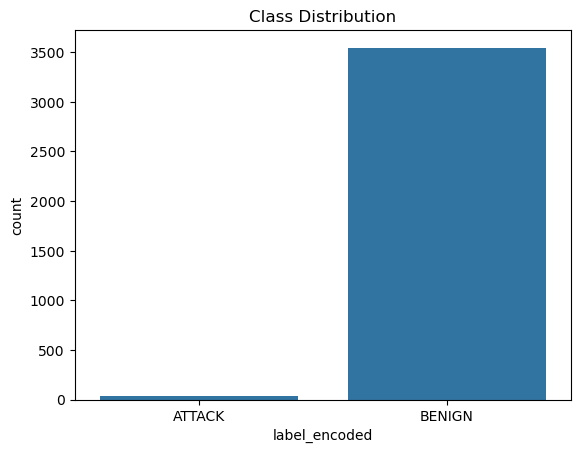

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Value counts
print(y.value_counts(normalize=True))
# Plot
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks([0, 1], ['ATTACK', 'BENIGN'])
plt.show()

In [32]:
X.to_csv('../data/curated/df_features.csv', index=False)
y.to_csv('../data/curated/df_target.csv', index=False)

In [ ]:
#Se identificó un desbalanceo extremo (98.8% BENIGN vs 1.1% ATTACK), crítico para el 
#modelado predictivo.
